<a href="https://colab.research.google.com/github/novojitdas/Computer-Vision/blob/main/colab/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network

![nn](https://b2633864.smushcdn.com/2633864/wp-content/uploads/2021/04/perceptron-768x559.png?lossy=2&strip=1&webp=1)

##Activation Functions

 Activation functions allowing it to learn complex patterns and representations from the data. Activation functions determine the output of a neuron or node in a neural network based on its weighted input.

 **Sigmoid Function (Logistic Activation):** The sigmoid function squashes the input values to a range between 0 and 1. It's often used in binary classification problems, where the output represents probabilities.

**Hyperbolic Tangent Function (tanh):** The tanh function is similar to the sigmoid but maps input values to a range between -1 and 1, making it zero-centered. It is often used in hidden layers of neural networks.

**Rectified Linear Unit (ReLU):** ReLU is one of the most widely used activation functions. It returns the input for positive values and zero for negative values. It's computationally efficient and helps mitigate the vanishing gradient problem.

**Leaky ReLU:** Leaky ReLU is a variation of ReLU that allows a small gradient for negative inputs, which helps mitigate the "dying ReLU" problem where neurons can become inactive during training.

**Exponential Linear Unit (ELU):** ELU is another variation of ReLU that has a smoother transition for negative values, which can help with training deep networks. It also allows negative values.

![img](https://b2633864.smushcdn.com/2633864/wp-content/uploads/2021/04/activation_functions-768x585.png?lossy=2&strip=1&webp=1)

##Perceptron

A perceptron is a fundamental building block in neural networks, and it serves as the simplest form of an artificial neuron. It was developed by Frank Rosenblatt in the late 1950s. A perceptron takes a set of inputs, performs a weighted sum of those inputs, and then applies an activation function to produce an output. The output is often binary (0 or 1) or can be a continuous value, depending on the activation function used.

![perceptron](https://i.imgur.com/z0cHJoX.png)

Here are the key components and characteristics of a perceptron in a neural network:

Input: A perceptron receives a set of input values, often denoted as x1, x2, x3, ..., xn. These inputs can represent features, and they can be real numbers or binary values.

Weights: Each input is associated with a weight (often denoted as w1, w2, w3, ..., wn). These weights represent the strength of the connection between the inputs and the perceptron.

Weighted Sum: The perceptron computes a weighted sum of the inputs and weights. This sum is represented as:

Weighted Sum = (w1 * x1) + (w2 * x2) + (w3 * x3) + ... + (wn * xn)

Bias: In addition to the weighted sum, a bias term (often denoted as b) is added to the sum. The bias allows the perceptron to account for situations where all inputs are zero, and it helps in controlling the activation threshold of the neuron.

Activation Function: The weighted sum plus the bias is then passed through an activation function (sometimes called a transfer function). The activation function determines the output of the perceptron. Common activation functions include the step function (a simple binary decision), the sigmoid function, the hyperbolic tangent (tanh), or the rectified linear unit (ReLU) function, among others.

The step function: Output is 1 if the weighted sum + bias is greater than or equal to 0, and 0 otherwise.
Sigmoid function: Produces an output in the range (0, 1), making it suitable for binary classification tasks.
Hyperbolic tangent (tanh): Produces an output in the range (-1, 1).
ReLU function: Output is zero if the weighted sum + bias is less than 0, and it is equal to the weighted sum + bias otherwise.
Output: The final output of the perceptron is the result of the activation function. This output is used as an input for subsequent layers in a neural network.

Perceptrons are limited in their capabilities and can only model linearly separable functions, which means they can't handle more complex, nonlinear problems. However, by combining multiple perceptrons in layers and using more advanced activation functions, neural networks can approximate a wide range of functions, making them suitable for tasks like image recognition, natural language processing, and many other machine learning and artificial intelligence applications. These more complex neural networks are often referred to as multi-layer perceptrons (MLPs) or feedforward neural networks.

In [ ]:
# Importing Packages
import numpy as np

### Implementing Perceptron

In [ ]:
class Perceptron:
	def __init__(self, N, alpha=0.1):
		# initialize the weight matrix and store the learning rate
		self.W = np.random.randn(N + 1) / np.sqrt(N)
		self.alpha = alpha

	def step(self, x):
		# apply the step function
		return 1 if x > 0 else 0

	def fit(self, X, y, epochs=10):
		# insert a column of 1's as the last entry in the feature
		# matrix -- this little trick allows us to treat the bias
		# as a trainable parameter within the weight matrix
		X = np.c_[X, np.ones((X.shape[0]))]

		# loop over the desired number of epochs
		for epoch in np.arange(0, epochs):
			# loop over each individual data point
			for (x, target) in zip(X, y):
				# take the dot product between the input features
				# and the weight matrix, then pass this value
				# through the step function to obtain the prediction
				p = self.step(np.dot(x, self.W))

				# only perform a weight update if our prediction
				# does not match the target
				if p != target:
					# determine the error
					error = p - target

					# update the weight matrix
					self.W += -self.alpha * error * x

	def predict(self, X, addBias=True):
		# ensure our input is a matrix
		X = np.atleast_2d(X)

		# check to see if the bias column should be added
		if addBias:
			# insert a column of 1's as the last entry in the feature
			# matrix (bias)
			X = np.c_[X, np.ones((X.shape[0]))]

		# take the dot product between the input features and the
		# weight matrix, then pass the value through the step
		# function
		return self.step(np.dot(X, self.W))

### Perceptron on bitwise datasets

###OR


In [ ]:
# construct the OR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])

# define our perceptron and train it
print("[INFO] training perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=25)

[INFO] training perceptron...


In [ ]:
# now that our perceptron is trained we can evaluate it
print("[INFO] testing perceptron...")

# now that our network is trained, loop over the data points
for (x, target) in zip(X, y):
	# make a prediction on the data point and display the result
	# to our console
	pred = p.predict(x)
	print("[INFO] data={}, ground-truth={}, pred={}".format(
		x, target[0], pred))

[INFO] testing perceptron...
[INFO] data=[0 0], ground-truth=0, pred=0
[INFO] data=[0 1], ground-truth=1, pred=1
[INFO] data=[1 0], ground-truth=1, pred=1
[INFO] data=[1 1], ground-truth=1, pred=1


###AND

In [ ]:
# construct the AND dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

# define our perceptron and train it
print("[INFO] training perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=20)

# now that our perceptron is trained we can evaluate it
print("[INFO] testing perceptron...")

# now that our network is trained, loop over the data points
for (x, target) in zip(X, y):
	# make a prediction on the data point and display the result
	# to our console
	pred = p.predict(x)
	print("[INFO] data={}, ground-truth={}, pred={}".format(
		x, target[0], pred))

[INFO] training perceptron...
[INFO] testing perceptron...
[INFO] data=[0 0], ground-truth=0, pred=0
[INFO] data=[0 1], ground-truth=0, pred=0
[INFO] data=[1 0], ground-truth=0, pred=0
[INFO] data=[1 1], ground-truth=1, pred=1


###XOR

In [ ]:
# construct the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# define our perceptron and train it
print("[INFO] training perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
p.fit(X, y, epochs=20)

# now that our perceptron is trained we can evaluate it
print("[INFO] testing perceptron...")

# now that our network is trained, loop over the data points
for (x, target) in zip(X, y):
	# make a prediction on the data point and display the result
	# to our console
	pred = p.predict(x)
	print("[INFO] data={}, ground-truth={}, pred={}".format(
		x, target[0], pred))

[INFO] training perceptron...
[INFO] testing perceptron...
[INFO] data=[0 0], ground-truth=0, pred=1
[INFO] data=[0 1], ground-truth=1, pred=1
[INFO] data=[1 0], ground-truth=1, pred=0
[INFO] data=[1 1], ground-truth=0, pred=0


##Backpropagation
The backpropagation algorithm consists of two phases:

1. **The forward pass:** where our inputs are passed through the network and output predictions obtained (also known as the propagation phase).

2. **The backward pass:** where we compute the gradient of the loss function at the final layer (i.e., predictions layer) of the network and use this gradient to recursively apply the chain rule to update the weights in our network (also known as the weight update phase).

To obtain perfect classification accuracy on this problem we’ll need a feedforward neural network with at least a single hidden layer, so let’s go ahead and start with a 2−2−1 architecture (Figure 1, top). This is a good start; however, we’re forgetting to include the bias term. There are two ways to include the bias term b in our network. We can either:

1. Use a separate variable.
2. Treat the bias as a trainable parameter within the weight matrix by inserting a column of 1’s into the feature vectors.

![arch](https://b2633864.smushcdn.com/2633864/wp-content/uploads/2021/04/forward_pass_setup-768x774.png?lossy=2&strip=1&webp=1)

Inserting a column of 1’s into our feature vector is done programmatically, but to ensure we understand this point, let’s update our XOR design matrix to explicitly see this taking place (Table 1, right). As you can see, a column of 1’s have been added to our feature vectors. In practice you can insert this column anywhere you like, but we typically place it either as (1) the first entry in the feature vector or (2) the last entry in the feature vector.

Since we have changed the size of our input feature vector (normally performed inside neural network implementation itself so that we do not need to explicitly modify our design matrix), that changes our (perceived) network architecture from 2−2−1 to an (internal) 3−3−1 (Figure 1, bottom).

We’ll still refer to this network architecture as 2−2−1, but when it comes to implementation, it’s actually 3−3−1 due to the addition of the bias term embedded in the weight matrix.

Finally, recall that both our input layer and all hidden layers require a bias term; however, the final output layer does not require a bias. The benefit of applying the bias trick is that we do not need to explicitly keep track of the bias parameter any longer — it is now a trainable parameter within the weight matrix, thus making training more efficient and substantially easier to implement.

To see the forward pass in action, we first initialize the weights in our network, as in Figure 2. Notice how each arrow in the weight matrix has a value associated with it — this is the current weight value for a given node and signifies the amount in which a given input is amplified or diminished. This weight value will then be updated during the backpropagation phase.

![fig2](https://b2633864.smushcdn.com/2633864/wp-content/uploads/2021/04/forward_pass_init-768x616.png?lossy=2&strip=1&webp=1)

Inserting a column of 1’s into our feature vector is done programmatically, but to ensure we understand this point, let’s update our XOR design matrix to explicitly see this taking place (Table 1, right). As you can see, a column of 1’s have been added to our feature vectors. In practice you can insert this column anywhere you like, but we typically place it either as (1) the first entry in the feature vector or (2) the last entry in the feature vector.

Since we have changed the size of our input feature vector (normally performed inside neural network implementation itself so that we do not need to explicitly modify our design matrix), that changes our (perceived) network architecture from 2−2−1 to an (internal) 3−3−1 (Figure 1, bottom).

We’ll still refer to this network architecture as 2−2−1, but when it comes to implementation, it’s actually 3−3−1 due to the addition of the bias term embedded in the weight matrix.

Finally, recall that both our input layer and all hidden layers require a bias term; however, the final output layer does not require a bias. The benefit of applying the bias trick is that we do not need to explicitly keep track of the bias parameter any longer — it is now a trainable parameter within the weight matrix, thus making training more efficient and substantially easier to implement.

To see the forward pass in action, we first initialize the weights in our network, as in Figure 2. Notice how each arrow in the weight matrix has a value associated with it — this is the current weight value for a given node and signifies the amount in which a given input is amplified or diminished. This weight value will then be updated during the backpropagation phase.

On the far left of Figure 2, we present the feature vector (0, 1, 1) (and target output value 1 to the network). Here we can see that 0, 1, and 1 have been assigned to the three input nodes in the network. To propagate the values through the network and obtain the final classification, we need to take the dot product between the inputs and the weight values, followed by applying an activation function (in this case, the sigmoid function, σ).

Let’s compute the inputs to the three nodes in the hidden layers:

σ((0×0.351) + (1×1.076) + (1×1.116)) = 0.899
σ((0× −0.097) + (1× −0.165) + (1×0.542)) = 0.593
σ((0×0.457) + (1× −0.165) + (1× −0.331)) = 0.378
Looking at the node values of the hidden layers (Figure 2, middle), we can see the nodes have been updated to reflect our computation.

We now have our inputs to the hidden layer nodes. To compute the output prediction, we once again compute the dot product followed by a sigmoid activation:

(1) σ((0.899×0.383) + (0.593× −0.327) + (0.378× −0.329)) = 0.506

The output of the network is thus 0.506. We can apply a step function to determine if this output is the correct classification or not:

![formula](https://b2633864.smushcdn.com/2633864/wp-content/latex/f4d/f4d4c9bedaba059ad269625523526821-ffffff-000000-0.png?size=172x51&lossy=2&strip=1&webp=1)

Applying the step function with net = 0.506 we see that our network predicts 1 which is, in fact, the correct class label. However, our network is not very confident in this class label — the predicted value 0.506 is very close to the threshold of the step. Ideally, this prediction should be closer to 0.98−0.99, implying that our network has truly learned the underlying pattern in the dataset. In order for our network to actually “learn,” we need to apply the backward pass.

###Impementing Backpropagation

In [ ]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
import numpy as np

In [ ]:
class NeuralNetwork:
	def __init__(self, layers, alpha=0.1):
		# initialize the list of weights matrices, then store the
		# network architecture and learning rate
		self.W = []
		self.layers = layers
		self.alpha = alpha

		# start looping from the index of the first layer but
		# stop before we reach the last two layers
		for i in np.arange(0, len(layers) - 2):
			# randomly initialize a weight matrix connecting the
			# number of nodes in each respective layer together,
			# adding an extra node for the bias
			w = np.random.randn(layers[i] + 1, layers[i + 1] + 1)
			self.W.append(w / np.sqrt(layers[i]))

		# the last two layers are a special case where the input
		# connections need a bias term but the output does not
		w = np.random.randn(layers[-2] + 1, layers[-1])
		self.W.append(w / np.sqrt(layers[-2]))

	def __repr__(self):
		# construct and return a string that represents the network
		# architecture
		return "NeuralNetwork: {}".format(
			"-".join(str(l) for l in self.layers))

	def sigmoid(self, x):
		# compute and return the sigmoid activation value for a
		# given input value
		return 1.0 / (1 + np.exp(-x))

	def sigmoid_deriv(self, x):
		# compute the derivative of the sigmoid function ASSUMING
		# that `x` has already been passed through the `sigmoid`
		# function
		return x * (1 - x)

	def fit(self, X, y, epochs=1000, displayUpdate=100):
		# insert a column of 1's as the last entry in the feature
		# matrix -- this little trick allows us to treat the bias
		# as a trainable parameter within the weight matrix
		X = np.c_[X, np.ones((X.shape[0]))]

		# loop over the desired number of epochs
		for epoch in np.arange(0, epochs):
			# loop over each individual data point and train
			# our network on it
			for (x, target) in zip(X, y):
				self.fit_partial(x, target)

			# check to see if we should display a training update
			if epoch == 0 or (epoch + 1) % displayUpdate == 0:
				loss = self.calculate_loss(X, y)
				print("[INFO] epoch={}, loss={:.7f}".format(
					epoch + 1, loss))

	def fit_partial(self, x, y):
		# construct our list of output activations for each layer
		# as our data point flows through the network; the first
		# activation is a special case -- it's just the input
		# feature vector itself
		A = [np.atleast_2d(x)]

		# FEEDFORWARD:
		# loop over the layers in the network
		for layer in np.arange(0, len(self.W)):
			# feedforward the activation at the current layer by
			# taking the dot product between the activation and
			# the weight matrix -- this is called the "net input"
			# to the current layer
			net = A[layer].dot(self.W[layer])

			# computing the "net output" is simply applying our
			# non-linear activation function to the net input
			out = self.sigmoid(net)

			# once we have the net output, add it to our list of
			# activations
			A.append(out)

		# BACKPROPAGATION
		# the first phase of backpropagation is to compute the
		# difference between our *prediction* (the final output
		# activation in the activations list) and the true target
		# value
		error = A[-1] - y

		# from here, we need to apply the chain rule and build our
		# list of deltas `D`; the first entry in the deltas is
		# simply the error of the output layer times the derivative
		# of our activation function for the output value
		D = [error * self.sigmoid_deriv(A[-1])]

		# once you understand the chain rule it becomes super easy
		# to implement with a `for` loop -- simply loop over the
		# layers in reverse order (ignoring the last two since we
		# already have taken them into account)
		for layer in np.arange(len(A) - 2, 0, -1):
			# the delta for the current layer is equal to the delta
			# of the *previous layer* dotted with the weight matrix
			# of the current layer, followed by multiplying the delta
			# by the derivative of the non-linear activation function
			# for the activations of the current layer
			delta = D[-1].dot(self.W[layer].T)
			delta = delta * self.sigmoid_deriv(A[layer])
			D.append(delta)

		# since we looped over our layers in reverse order we need to
		# reverse the deltas
		D = D[::-1]

		# WEIGHT UPDATE PHASE
		# loop over the layers
		for layer in np.arange(0, len(self.W)):
			# update our weights by taking the dot product of the layer
			# activations with their respective deltas, then multiplying
			# this value by some small learning rate and adding to our
			# weight matrix -- this is where the actual "learning" takes
			# place
			self.W[layer] += -self.alpha * A[layer].T.dot(D[layer])

	def predict(self, X, addBias=True):
		# initialize the output prediction as the input features -- this
		# value will be (forward) propagated through the network to
		# obtain the final prediction
		p = np.atleast_2d(X)

		# check to see if the bias column should be added
		if addBias:
			# insert a column of 1's as the last entry in the feature
			# matrix (bias)
			p = np.c_[p, np.ones((p.shape[0]))]

		# loop over our layers in the network
		for layer in np.arange(0, len(self.W)):
			# computing the output prediction is as simple as taking
			# the dot product between the current activation value `p`
			# and the weight matrix associated with the current layer,
			# then passing this value through a non-linear activation
			# function
			p = self.sigmoid(np.dot(p, self.W[layer]))

		# return the predicted value
		return p

	def calculate_loss(self, X, targets):
		# make predictions for the input data points then compute
		# the loss
		targets = np.atleast_2d(targets)
		predictions = self.predict(X, addBias=False)
		loss = 0.5 * np.sum((predictions - targets) ** 2)

		# return the loss
		return loss

###Backpropagation with bitwise xor

In [ ]:
# construct the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# define our 2-2-1 neural network and train it
nn = NeuralNetwork([2, 2, 1], alpha=0.5)
nn.fit(X, y, epochs=20000)

# now that our network is trained, loop over the XOR data points
for (x, target) in zip(X, y):
	# make a prediction on the data point and display the result
	# to our console
	pred = nn.predict(x)[0][0]
	step = 1 if pred > 0.5 else 0
	print("[INFO] data={}, ground-truth={}, pred={:.4f}, step={}".format(
		x, target[0], pred, step))


[INFO] epoch=1, loss=0.5011958
[INFO] epoch=100, loss=0.4993236
[INFO] epoch=200, loss=0.4986790
[INFO] epoch=300, loss=0.4973990
[INFO] epoch=400, loss=0.4942430
[INFO] epoch=500, loss=0.4852055
[INFO] epoch=600, loss=0.4609070
[INFO] epoch=700, loss=0.4127845
[INFO] epoch=800, loss=0.3217109
[INFO] epoch=900, loss=0.1589114
[INFO] epoch=1000, loss=0.0645025
[INFO] epoch=1100, loss=0.0337388
[INFO] epoch=1200, loss=0.0213986
[INFO] epoch=1300, loss=0.0152215
[INFO] epoch=1400, loss=0.0116346
[INFO] epoch=1500, loss=0.0093325
[INFO] epoch=1600, loss=0.0077466
[INFO] epoch=1700, loss=0.0065959
[INFO] epoch=1800, loss=0.0057269
[INFO] epoch=1900, loss=0.0050498
[INFO] epoch=2000, loss=0.0045088
[INFO] epoch=2100, loss=0.0040675
[INFO] epoch=2200, loss=0.0037012
[INFO] epoch=2300, loss=0.0033928
[INFO] epoch=2400, loss=0.0031297
[INFO] epoch=2500, loss=0.0029028
[INFO] epoch=2600, loss=0.0027053
[INFO] epoch=2700, loss=0.0025320
[INFO] epoch=2800, loss=0.0023787
[INFO] epoch=2900, loss=0.

###MNIST

In [ ]:
# load the MNIST dataset and apply min/max scaling to scale the
# pixel intensity values to the range [0, 1] (each image is
# represented by an 8 x 8 = 64-dim feature vector)
print("[INFO] loading MNIST (sample) dataset...")
digits = datasets.load_digits()
data = digits.data.astype("float")
data = (data - data.min()) / (data.max() - data.min())
print("[INFO] samples: {}, dim: {}".format(data.shape[0],
	data.shape[1]))

# construct the training and testing splits
(trainX, testX, trainY, testY) = train_test_split(data,
	digits.target, test_size=0.25)

# convert the labels from integers to vectors
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

# train the network
print("[INFO] training network...")
nn = NeuralNetwork([trainX.shape[1], 32, 16, 10])
print("[INFO] {}".format(nn))
nn.fit(trainX, trainY, epochs=1000)

# evaluate the network
print("[INFO] evaluating network...")
predictions = nn.predict(testX)
predictions = predictions.argmax(axis=1)
print(classification_report(testY.argmax(axis=1), predictions))

[INFO] loading MNIST (sample) dataset...
[INFO] samples: 1797, dim: 64
[INFO] training network...
[INFO] NeuralNetwork: 64-32-16-10
[INFO] epoch=1, loss=605.1392738
[INFO] epoch=100, loss=6.5362080
[INFO] epoch=200, loss=3.0182896
[INFO] epoch=300, loss=1.9614298
[INFO] epoch=400, loss=1.4029129
[INFO] epoch=500, loss=1.2850185
[INFO] epoch=600, loss=1.2205092
[INFO] epoch=700, loss=1.1793839
[INFO] epoch=800, loss=1.1508442
[INFO] epoch=900, loss=1.1298927
[INFO] epoch=1000, loss=1.1138747
[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       0.98      0.95      0.96        42
           2       0.98      0.98      0.98        48
           3       0.98      0.96      0.97        55
           4       0.96      0.98      0.97        45
           5       0.98      0.95      0.96        56
           6       0.97      0.95      0.96        38
           7       0.98      0.95      0.9

##Implementing feedforward neural networks with Keras and TensorFlow


###MNIST WITH Keras and tensorflow

In [ ]:
#importing packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np


[INFO] accessing MNIST...
11490434/11490434 [==============================] - 0s 0us/step
[INFO] training network...
Epoch 1/100
469/469 [==============================] - 5s 10ms/step - loss: 2.2788 - accuracy: 0.1985 - val_loss: 2.2435 - val_accuracy: 0.2751
Epoch 2/100
469/469 [==============================] - 3s 7ms/step - loss: 2.2098 - accuracy: 0.3731 - val_loss: 2.1692 - val_accuracy: 0.4832
Epoch 3/100
469/469 [==============================] - 3s 7ms/step - loss: 2.1232 - accuracy: 0.4952 - val_loss: 2.0638 - val_accuracy: 0.5830
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 1.9972 - accuracy: 0.5606 - val_loss: 1.9100 - val_accuracy: 0.5879
Epoch 5/100
469/469 [==============================] - 4s 8ms/step - loss: 1.8222 - accuracy: 0.6013 - val_loss: 1.7101 - val_accuracy: 0.6503
Epoch 6/100
469/469 [==============================] - 5s 11ms/step - loss: 1.6139 - accuracy: 0.6504 - val_loss: 1.4961 - val_accuracy: 0.6799
Epoch 7/100
469/469 [=

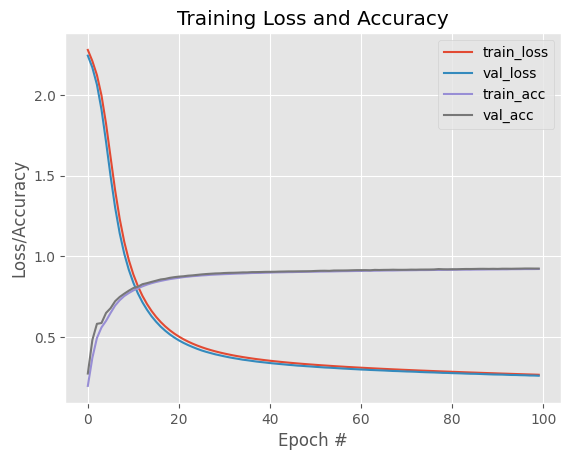

In [ ]:
# grab the MNIST dataset (if this is your first time using this
# dataset then the 11MB download may take a minute)
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()

# each image in the MNIST dataset is represented as a 28x28x1
# image, but in order to apply a standard neural network we must
# first "flatten" the image to be simple list of 28x28=784 pixels
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=100, batch_size=128)

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in lb.classes_]))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

###CIFAR10

In [ ]:
# load the training and testing data, scale it into the range [0, 1],
# then reshape the design matrix
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
	"dog", "frog", "horse", "ship", "truck"]

# define the 3072-1024-512-10 architecture using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=100, batch_size=32)

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=labelNames))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

[INFO] loading CIFAR-10 data...
170498071/170498071 [==============================] - 3s 0us/step
[INFO] training network...
Epoch 1/100
1563/1563 [==============================] - 55s 35ms/step - loss: 1.8308 - accuracy: 0.3481 - val_loss: 1.7121 - val_accuracy: 0.3855
Epoch 2/100
1563/1563 [==============================] - 50s 32ms/step - loss: 1.6497 - accuracy: 0.4181 - val_loss: 1.7524 - val_accuracy: 0.3755
Epoch 3/100
1563/1563 [==============================] - 50s 32ms/step - loss: 1.5717 - accuracy: 0.4451 - val_loss: 1.5718 - val_accuracy: 0.4451
Epoch 4/100
1563/1563 [==============================] - 50s 32ms/step - loss: 1.5131 - accuracy: 0.4687 - val_loss: 1.5113 - val_accuracy: 0.4683
Epoch 5/100
1563/1563 [==============================] - 51s 32ms/step - loss: 1.4646 - accuracy: 0.4832 - val_loss: 1.5231 - val_accuracy: 0.4460
Epoch 6/100
1563/1563 [==============================] - 53s 34ms/step - loss: 1.4228 - accuracy: 0.4998 - val_loss: 1.4647 - val_accuracy:

KeyboardInterrupt: ignored